In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import datetime
from scipy import stats
import scipy

# Read datasets

### posts dataset

In [3]:
df = pd.read_csv('./instagram_posts.csv/instagram_posts.csv',sep='\t', dtype=str, nrows=1000000)
df = df.rename(columns={"numbr_likes": "number_likes"})
df = df.dropna()
#print(df)
df['sid'] = df['sid'].astype(np.int32)
df['sid_profile'] = df['sid_profile'].astype(np.int32)
df['post_id'] = df['post_id'].astype(np.str)
# ###########df['profile_id'] = df['profile_id'].astype(np.int32)
df['profile_id'] = df['profile_id'].astype(str)
df['location_id'] = df['location_id'].astype(np.int32)
df['cts'] = df['cts'].astype(str)
df['post_type'] = df['post_type'].astype(np.int32)
# df['description'] = df['description'].astype(str)
df['number_likes'] = df['number_likes'].astype(np.int32)
df['number_comments'] = df['number_comments'].astype(np.int32)
df.head()

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,number_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,822632667,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5579335020,-130812897,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,313429634,-130812897,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1837592700,-130812897,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1131527143,-130812897,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


### profiles dataset

In [4]:
prof_df = pd.read_csv('./instagram_profiles.csv/instagram_profiles.csv', sep='\t', dtype=np.str, error_bad_lines=False)

prof_df = prof_df.dropna()
prof_df['n_posts'] = prof_df['n_posts'].astype(np.int32)
prof_df['followers'] = prof_df['followers'].astype(np.int32)
prof_df['following'] = prof_df['following'].astype(np.int32)

prof_df.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
1,4184457,590583002,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534,1145,2878,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,false
2,4184460,1074146658,yellowlightbreen,Eliza Gray,Maine is for Lovers,469,324,431,elizajanegray.com,2019-08-01 14:39:54.407 -0400,false
6,4184471,2061867521,masslivehs,MassLive High School Sports,Your spot for the best Western Mass. high scho...,157,4137,753,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,true
13,4184486,304139153,katepani413,kp!!!! ☆,cowley college volleyball\n3.18.19 @garrett.lange,1543,3008,115,vsco.co/kpani,2019-08-01 14:41:46.967 -0400,true
50,4184480,9947274404,jk_vastgoed,JK VASTGOED,Een vernieuwend vastgoedkantoor waarbij persoo...,215,182,14,www.jkvastgoed.be,2019-08-01 14:41:25.930 -0400,true


### location dataset

In [5]:
loc_df = pd.read_csv('./instagram_locations.csv/instagram_locations.csv', sep='\t', error_bad_lines=False)
loc_df.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


# Problem 1

In [9]:
df.info()
print("-------------------------------------------------------------------------------------------")
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914676 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sid              914676 non-null  int32 
 1   sid_profile      914676 non-null  int32 
 2   post_id          914676 non-null  object
 3   profile_id       914676 non-null  object
 4   location_id      914676 non-null  int32 
 5   cts              914676 non-null  object
 6   post_type        914676 non-null  int32 
 7   description      914676 non-null  object
 8   number_likes     914676 non-null  int32 
 9   number_comments  914676 non-null  int32 
dtypes: int32(6), object(4)
memory usage: 55.8+ MB
------------------------------------


,sid,sid_profile,location_id,post_type,number_likes,number_comments
count,9.146760e+05,9.146760e+05,9.146760e+05,914676.000000,9.146760e+05,914676.000000
mean,2.846406e+07,2.345953e+05,3.600099e+08,1.059889,3.205635e+02,7.733264
std,2.325953e+06,8.215945e+05,7.575034e+08,0.237295,5.798666e+03,191.478005
min,3.245800e+04,-1.000000e+00,-2.147460e+09,1.000000,0.000000e+00,0.000000
25%,2.858671e+07,-1.000000e+00,2.292358e+08,1.000000,2.100000e+01,0.000000
50%,2.885097e+07,-1.000000e+00,3.539620e+08,1.000000,5.000000e+01,2.000000
75%,2.911958e+07,-1.000000e+00,8.532055e+08,1.000000,1.290000e+02,6.000000
max,2.938839e+07,4.510554e+06,2.147346e+09,3.000000,1.963123e+06,135221.000000


In [10]:
df.corr()

,sid,sid_profile,location_id,post_type,number_likes,number_comments
sid,1.000000,-0.330481,0.020531,0.027634,-0.006509,-0.010529
sid_profile,-0.330481,1.000000,-0.001722,-0.005669,0.030783,0.014671
location_id,0.020531,-0.001722,1.000000,0.002761,0.000110,-0.001114
post_type,0.027634,-0.005669,0.002761,1.000000,0.004253,0.004881
number_likes,-0.006509,0.030783,0.000110,0.004253,1.000000,0.378571
number_comments,-0.010529,0.014671,-0.001114,0.004881,0.378571,1.000000


In [22]:
df.nunique()

sid                914676
sid_profile         51469
post_id            914676
profile_id         699369
location_id         44390
cts                866276
post_type               3
description        876627
number_likes        10231
number_comments      1114
dtype: int64

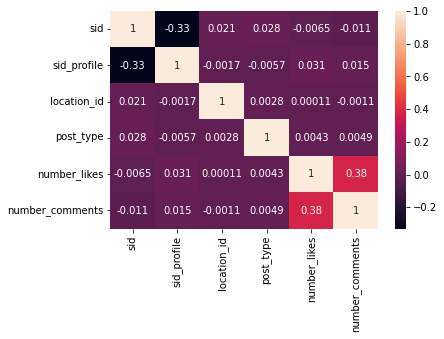

/home/arefhz75/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


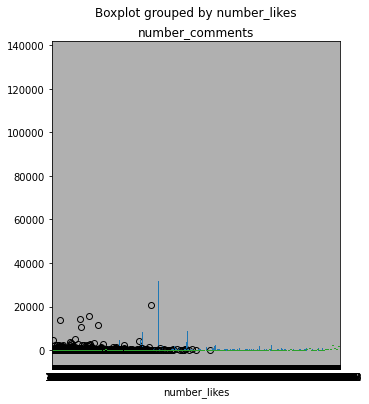

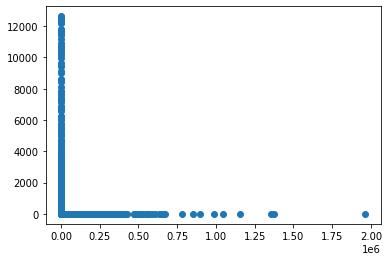

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

df.boxplot('number_comments','number_likes',figsize=(5,6))
plt.show()
n_likes = df['number_likes'].value_counts()
#print(n_likes)
#print(n_likes.index)
plt.scatter(list(n_likes.index),n_likes.to_numpy())
plt.show()

In [23]:
prof_df.info()
print("-------------------------------------------------------------------------------------------")
prof_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746064 entries, 1 to 4509572
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   sid                  746064 non-null  object
 1   profile_id           746064 non-null  object
 2   profile_name         746064 non-null  object
 3   firstname_lastname   746064 non-null  object
 4   description          746064 non-null  object
 5   following            746064 non-null  int32 
 6   followers            746064 non-null  int32 
 7   n_posts              746064 non-null  int32 
 8   url                  746064 non-null  object
 9   cts                  746064 non-null  object
 10  is_business_account  746064 non-null  object
dtypes: int32(3), object(8)
memory usage: 59.8+ MB
-------------------------------------------------------------------------------------------


,following,followers,n_posts
count,7.460640e+05,7.460640e+05,746064.000000
mean,1.734034e+03,1.126961e+04,670.256459
std,1.536903e+04,1.553586e+05,1417.273477
min,0.000000e+00,0.000000e+00,0.000000
25%,4.510000e+02,4.270000e+02,83.000000
50%,9.380000e+02,9.990000e+02,278.000000
75%,2.012000e+03,2.746000e+03,754.000000
max,4.191080e+06,2.954214e+07,142428.000000


In [14]:
prof_df.corr()

,following,followers,n_posts
following,1.000000,0.018836,0.020581
followers,0.018836,1.000000,0.099640
n_posts,0.020581,0.099640,1.000000


In [21]:
prof_df.nunique()

sid                    746064
profile_id             745830
profile_name           745832
firstname_lastname     699319
description            740674
following                7800
followers               53497
n_posts                 10175
url                    724311
cts                    745685
is_business_account         2
dtype: int64

In [24]:
loc_df.info()
print("-------------------------------------------------------------------------------------------")
loc_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

,sid,id,lat,lng
count,1.022658e+06,1.022658e+06,1.016495e+06,1.016495e+06
mean,5.274856e+05,3.152851e+14,-1.529215e+01,3.421718e+01
std,2.994567e+05,5.795031e+14,7.615085e+01,2.201081e+01
min,1.000000e+00,7.000000e+00,-1.799830e+02,-9.000000e+01
25%,2.688392e+05,2.522377e+08,-8.015575e+01,2.997554e+01
50%,5.300405e+05,8.573350e+08,-2.450000e+00,4.067820e+01
75%,7.866598e+05,3.304662e+14,3.071740e+01,4.884722e+01
max,1.043657e+06,2.402148e+16,1.799941e+02,8.999870e+01


In [15]:
loc_df.corr()

,sid,id,lat,lng
sid,1.000000,0.043573,0.185049,0.009029
id,0.043573,1.000000,0.065300,-0.022569
lat,0.185049,0.065300,1.000000,-0.205567
lng,0.009029,-0.022569,-0.205567,1.000000


In [19]:
loc_df.nunique()

sid                       1022658
id                        1022658
name                       935776
street                     656262
zip                        181474
city                       118541
region                       1743
cd                            245
phone                      577305
aj_exact_city_match             2
aj_exact_country_match          2
blurb                      399340
dir_city_id                121685
dir_city_name              114996
dir_city_slug              114426
dir_country_id                234
dir_country_name              235
lat                        921025
lng                        899919
primary_alias_on_fb        425486
slug                       833398
website                    583671
cts                       1022298
dtype: int64

# Problem 2

### task 2.1

[]

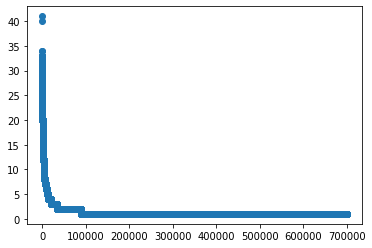

In [29]:
posts = df.groupby(['profile_id']).size().sort_values(ascending=False)
ids = list(posts.index)
num_posts = posts.to_numpy()
#print(ids[:50])
#print(num_posts[:50])
#plt.scatter(np.arange(len(num_posts)),num_posts)
plt.plot(np.arange(len(num_posts)),num_posts,'o')
plt.plot()

### Task 2.2

In [30]:
high_likes = df.sort_values(['number_likes'],ascending=False)
print(high_likes[['profile_id','number_likes']])

         profile_id  number_likes
313806   4731970969       1963123
918473    191110424       1376659
233650   1408289748       1355678
712304    270902355       1153291
573395   3439002676       1043810
...             ...           ...
355346  12654465284             0
265241  12408540820             0
320141    294518245             0
82812    9364842776             0
239344   1137183274             0

[914676 rows x 2 columns]


### Task 2.3

In [32]:
num_comments = df.sort_values(['number_comments'],ascending=False)
print(num_comments[['profile_id','number_comments']])
num_comments.head(5)

        profile_id  number_comments
242837    55336452           135221
579112    11884528            56686
313806  4731970969            53878
377722     7396934            32505
50077   3950062135            31655
...            ...              ...
500522   350972063                0
500517  2000005727                0
500514  4546289729                0
500508   295173999                0
498760  3141091213                0

[914676 rows x 2 columns]


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,number_likes,number_comments
242837,8685123,3335216,BQ_N0bzhTSL,55336452,214704942,2017-02-26 21:11:28.000,1,🍔🍟❤️,44218,135221
579112,28958520,327578,BmORc4znzzA,11884528,403373609,2018-08-08 17:31:05.000,1,Party in the castle with @benefitcosmetics 🎉 \...,427826,56686
313806,25304553,419203,BxrapKyCgg0,4731970969,361936204,2019-05-20 10:54:43.000,1,Склав присягу.,1963123,53878
377722,28754557,3358761,Bbz6IBXhKgg,7396934,254744290,2017-11-22 21:33:04.000,1,"Спасибо вам за все! Всех обнял! Я дома, все но...",81457,32505
50077,26831113,3234490,BuvfTmgFsuY,3950062135,35301594,2019-03-08 10:18:14.000,1,COMPETITION CLOSED. The winner is @abbie__will...,3867,31655


In [33]:
num_comments.tail(5)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,number_likes,number_comments
500522,28879031,-1,BmrunIDH_yo,350972063,301652848,2018-08-20 04:03:52.000,1,"More from the art museum today. Kansas City, y...",13,0
500517,28879026,-1,Bm9yVfTH1Tu,2000005727,301652848,2018-08-27 04:22:44.000,1,🌳,33,0
500514,28879023,-1,BnWvAomh3xk,4546289729,301652848,2018-09-05 20:54:41.000,1,Ohana⚡️,88,0
500508,28879013,-1,BxTRvoOFQjM,295173999,7626200,2019-05-11 01:55:11.000,1,2 years down🤪,68,0
498760,28877251,-1,Bx51KitBWNj,3141091213,300223320,2019-05-26 01:15:50.000,1,"Beautiful program of Mozart, Beethoven, Coulth...",23,0


### Task 2.4

In [34]:
_sid = df['sid'].to_numpy()
#print(_sid)
_tdf = pd.DataFrame()
cnt = 0
for i in range(len(_sid)):
    #temp = loc_df[loc_df['sid'] == _sid[i]]
    #_tdf = pd.concat([_tdf, temp])
    if _sid[i] in loc_df['sid']:
        cnt += 1
#print(_tdf)
print("number of posts with locations   ",cnt)

number of posts with locations    49


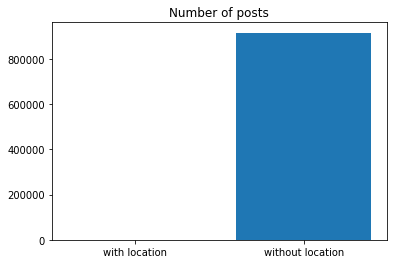

In [36]:
plt.bar(['with location','without location'], [cnt, len(_sid - cnt)])
plt.title('Number of posts')
plt.show()

### Task 2.5

In [37]:
ph_posts = df[df['post_type'] == 1]
print("posts with phtos   ",ph_posts.shape[0])
v_posts = df[df['post_type'] == 2]
print("posts with videos   ",v_posts.shape[0])
both_posts = df[df['post_type'] == 3]
print("posts with both   ",both_posts.shape[0])

posts with phtos    859900
posts with videos    54773
posts with both    3


### Task 2.6

In [39]:
_business = prof_df[prof_df['is_business_account'] == 'true']
tot = prof_df.shape[0]
print("business accounts percent   ", _business.shape[0]/tot)
print("non business accounts percent   ", (tot - _business.shape[0])/tot)

business accounts percent    0.5774973728795385
non business accounts percent    0.4225026271204615


# Problem 3

### Task 3.1

In [11]:
def count_posts_in_tint():
    p_time = df['cts'].to_numpy()
    time_int = []
    for i in range(len(p_time)):
        temp = p_time[i].split(' ')
        time_int.append(int(temp[1][:2]))
    #print(time_int[:20])
    time_counts = []
    for i in range(24):
        time_counts.append(time_int.count(i))
    return time_counts
ret = count_posts_in_tint()
for i in range(len(ret)):
    print("hour:",i,"  --  No. of posts: ",ret[i])

hour: 0   --  No. of posts:  34100
hour: 1   --  No. of posts:  30594
hour: 2   --  No. of posts:  29344
hour: 3   --  No. of posts:  27979
hour: 4   --  No. of posts:  25449
hour: 5   --  No. of posts:  22678
hour: 6   --  No. of posts:  20688
hour: 7   --  No. of posts:  22184
hour: 8   --  No. of posts:  24981
hour: 9   --  No. of posts:  28413
hour: 10   --  No. of posts:  31051
hour: 11   --  No. of posts:  34136
hour: 12   --  No. of posts:  37576
hour: 13   --  No. of posts:  41099
hour: 14   --  No. of posts:  45004
hour: 15   --  No. of posts:  47012
hour: 16   --  No. of posts:  50241
hour: 17   --  No. of posts:  52994
hour: 18   --  No. of posts:  55155
hour: 19   --  No. of posts:  55780
hour: 20   --  No. of posts:  55645
hour: 21   --  No. of posts:  53924
hour: 22   --  No. of posts:  48046
hour: 23   --  No. of posts:  40603


### Task 3.2, 3.3

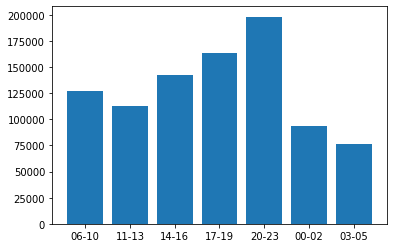

number of posts    [127317, 112811, 142257, 163929, 198218, 94038, 76106]


In [19]:
def extract_num_posts(df, intervals):
    p_time = df['cts'].to_numpy()
    time_int = []
    for i in range(len(p_time)):
        temp = p_time[i].split(' ')
        time_int.append(temp[1][:2]+temp[1][3:5]+temp[1][6:8])
    
    cnt = []
    for i in range(len(intervals)):
        temp = 0
        st_time = intervals[i][0][:2]+intervals[i][0][3:5]+intervals[i][0][6:8]
        end_time = intervals[i][1][:2]+intervals[i][1][3:5]+intervals[i][1][6:8]
        for j in range(len(time_int)):
            if time_int[j] >= st_time and time_int[j] <= end_time:
                temp += 1
        cnt.append(deepcopy(temp))
    plt.bar([i[0][:2]+'-'+i[1][:2] for i in intervals], cnt)
    plt.show()
    return cnt


ret = extract_num_posts(df,[
    ['06:00:00','10:59:59'], ['11:00:00','13:59:59'], ['14:00:00','16:59:59'], 
    ['17:00:00','19:59:59'], ['20:00:00','23:59:59'],['00:00:00','02:59:59'], ['03:00:00','05:59:59']])

print("number of posts   ",ret)

# Problem 4

### Task 4.1

In [20]:
def posts_of_id(profile_id):
    t = df[df['profile_id'] == profile_id]
    return t.shape[0]

posts_of_id('270902355')

2

### Task 4.2

In [21]:
def n_top_ids(n,prof_df):
    prof_ids = prof_df.sort_values(['n_posts'],ascending=False)['profile_id']
    prof_ids = prof_ids.to_numpy()[:n]
    posts = []
    for i in range(n):
        t = df[df['profile_id'] == prof_ids[i]]
        posts.append(t['description'])
    print(posts)
n_top_ids(25, prof_df)

[Series([], Name: description, dtype: object), 233067    อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...
241977    อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...
319192    อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...
637098    📞 สนใจตัวช่วย#dwfifteen🔥เพิ่มการเผาผลาญไขมัน\n...
Name: description, dtype: object, 494943    #gamt 1,290 free ems #gamtthailand #gamtsungla...
637087    📞 สนใจตัวช่วย#dwfifteen🔥เพิ่มการเผาผลาญไขมัน\n...
Name: description, dtype: object, Series([], Name: description, dtype: object), Series([], Name: description, dtype: object), Series([], Name: description, dtype: object), 153115    เช้าๆ แบบนี้ ⛅\n️ อย่าลืมทาน dwfifteen 💕 ก่อนอ...
233055    อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...
241969    อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...
241975    เช้าๆ แบบนี้ ⛅\n️ อย่าลืมทาน dwfifteen 💕 ก่อนอ...
Name: description, dtype: object, 220169    #gamt 1290.- #แม่สะดวกแบบนี้ #แม่ค้าออนไลน์ #เ...
Name: description, dtype: object, Series([], Name: de

### Task 4.3

In [22]:
def mean_likes(n):
    prof_ids = prof_df.sort_values(['n_posts'],ascending=False)['profile_id']
    prof_ids = prof_ids.to_numpy()[:n]
    
    posts = pd.DataFrame()
    for i in range(n):
        t = df[df['profile_id'] == prof_ids[i]]
        #posts.append(t[['number_likes', 'number_comments']])
        posts = pd.concat([posts, t])
    #print(posts)
    _mean = posts['number_likes'].mean()
    return _mean
    
print("mean likes   ",mean_likes(25))

mean likes    1.24


### Task 4.4

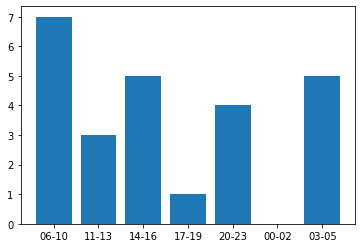

number of posts    [7, 3, 5, 1, 4, 0, 5]


In [23]:
def num_posts_of_tops(n):
    prof_ids = prof_df.sort_values(['n_posts'],ascending=False)['profile_id']
    prof_ids = prof_ids.to_numpy()[:n]
    posts = pd.DataFrame()
    for i in range(n):
        t = df[df['profile_id'] == prof_ids[i]]
        posts = pd.concat([posts, t])
    ret = extract_num_posts(posts,[
        ['06:00:00','10:59:59'], ['11:00:00','13:59:59'], ['14:00:00','16:59:59'], 
        ['17:00:00','19:59:59'], ['20:00:00','23:59:59'],['00:00:00','02:59:59'], ['03:00:00','05:59:59']])
    
    return ret
    
_n = num_posts_of_tops(25)
print("number of posts   ",_n)

# Problem 5

### Task 5.1

In [24]:
def no_of_posts_top(n):
    prof_ids = prof_df.sort_values(['followers'],ascending=False)[['profile_id','followers']]
    prof_ids = prof_ids.to_numpy()[:n]
    
    return prof_ids
    
a = no_of_posts_top(5)
for i in range(len(a)):
    print("profile id: ",a[i][0],"  ---   number of posts: ", a[i][1])

profile id:  496865116   ---   number of posts:  29542143
profile id:  23410080   ---   number of posts:  29176804
profile id:  907025384   ---   number of posts:  26252169
profile id:  10245870   ---   number of posts:  25021371
profile id:  3261799   ---   number of posts:  22319485


### Task 5.2

In [26]:
def influential_user():
    prof_ids = prof_df.sort_values(['followers'],ascending=False)
    prof_ids = prof_ids.to_numpy()[0]
    return prof_ids
    
a = influential_user()
print("most influential user")
print("instagram id:   ", a[2])
print("full name:      ", a[2])

most influential user
instagram id:    andresiniesta8
full name:       andresiniesta8


### Task 5.3

In [34]:
city_count = loc_df.groupby(['city']).size().sort_values(ascending=False)
cities = city_count.index.to_numpy()
city_count = city_count.to_numpy()
#print('cities', cities)
#print(city_count)

for i in range(min(len(city_count), 20)):
    print("city:  ", cities[i],"  --       No of posts: ", city_count[i])

city:   New York, New York   --       No of posts:  29954
city:   Moscow, Russia   --       No of posts:  21087
city:   London, United Kingdom   --       No of posts:  20251
city:   Saint Petersburg, Russia   --       No of posts:  8636
city:   Los Angeles, California   --       No of posts:  7175
city:   Brooklyn, New York   --       No of posts:  5976
city:   Paris, France   --       No of posts:  5729
city:   Chicago, Illinois   --       No of posts:  5284
city:   Toronto, Ontario   --       No of posts:  4189
city:   Seoul, Korea   --       No of posts:  3865
city:   São Paulo, Brazil   --       No of posts:  3651
city:   San Francisco, California   --       No of posts:  3585
city:   Bangkok, Thailand   --       No of posts:  3547
city:   Philadelphia, Pennsylvania   --       No of posts:  3088
city:   Washington, District of Columbia   --       No of posts:  3076
city:   Houston, Texas   --       No of posts:  2981
city:   Las Vegas, Nevada   --       No of posts:  2867
city:   M

### Task 5.4

posts with phtos:    0.9401143137023383
posts with videos:   0.059882406447747616
posts with both:     3.2798499140679324e-06


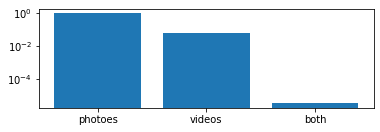

In [46]:
tot_posts = df.shape[0]
ph_posts = df[df['post_type'] == 1]
print("posts with phtos:   ",ph_posts.shape[0]/tot_posts)
v_posts = df[df['post_type'] == 2]
print("posts with videos:  ",v_posts.shape[0]/tot_posts)
both_posts = df[df['post_type'] == 3]
print("posts with both:    ",both_posts.shape[0]/tot_posts)

#plt.bar(['photoes','videos','both'],[ph_posts.shape[0]/tot_posts,v_posts.shape[0]/tot_posts,both_posts.shape[0]/tot_posts])
#plt.show()
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.bar(['photoes','videos','both'],[ph_posts.shape[0]/tot_posts,v_posts.shape[0]/tot_posts,both_posts.shape[0]/tot_posts])
ax.set_yscale('log')
plt.show()


### Task 5.5

In [51]:
print("--")
print("Photo only posts")
print("--------")
d_lc_pic = df[df['post_type'] == 1][['number_likes','number_comments']]
print("likes:     ",d_lc_pic['number_likes'].sum())
print("comments:  ",d_lc_pic['number_comments'].sum())
print("--")
print("Video only posts")
print("--------")
d_lc_vid = df[df['post_type'] == 2][['number_likes','number_comments']]
print("likes:     ",d_lc_vid['number_likes'].sum())
print("comments:  ",d_lc_vid['number_comments'].sum())
print("--")
print("Both included posts")
print("--------")
d_lc_mix = df[df['post_type'] == 3][['number_likes','number_comments']]
print("likes:     ",d_lc_mix['number_likes'].sum())
print("comments:  ",d_lc_mix['number_comments'].sum())

--
Photo only posts
--------
likes:      270306912
comments:   6446990
--
Video only posts
--------
likes:      22896754
comments:   626392
--
Both included posts
--------
likes:      8115
comments:   49


# Problem 6

### Task 6.1

In [54]:
top_ids = prof_df.sort_values(['n_posts'],ascending=False)
supp_data = top_ids[['followers', 'following']].to_numpy()[[1,2,6]]
top_ids = top_ids['profile_id'].to_numpy()[[1,2,6]]
#print(top_ids)
posts_1 = df[df['profile_id'] == top_ids[0]]
posts_2 = df[df['profile_id'] == top_ids[1]]
posts_3 = df[df['profile_id'] == top_ids[2]]

In [56]:
mean_seconds = []
## user 1
dt_str = posts_1['cts'].to_numpy()
dt = []
for i in range(len(dt_str)):
    datetime_object = datetime.datetime.strptime(dt_str[i][:-4], '%Y-%m-%d %H:%M:%S')
    dt.append(datetime_object)
#print(dt_1)
td = []
for i in range(1,len(dt)):
    delta = (dt[i] - dt[i-1]).seconds
    td.append(delta)
print("user 1 mean time between posts: ",np.mean(delta),"  seconds")
mean_seconds.append(np.mean(delta))

## user 2
dt_str = posts_2['cts'].to_numpy()
dt = []
for i in range(len(dt_str)):
    datetime_object = datetime.datetime.strptime(dt_str[i][:-4], '%Y-%m-%d %H:%M:%S')
    dt.append(datetime_object)
#print(dt_1)
td = []
for i in range(1,len(dt)):
    delta = (dt[i] - dt[i-1]).seconds
    td.append(delta)
print("user 2 mean time between posts: ",np.mean(delta),"  seconds")
mean_seconds.append(np.mean(delta))

## user 3
dt_str = posts_3['cts'].to_numpy()
dt = []
for i in range(len(dt_str)):
    datetime_object = datetime.datetime.strptime(dt_str[i][:-4], '%Y-%m-%d %H:%M:%S')
    dt.append(datetime_object)
#print(dt_1)
td = []
for i in range(1,len(dt)):
    delta = (dt[i] - dt[i-1]).seconds
    td.append(delta)
print("user 3 mean time between posts: ",np.mean(delta),"  seconds")
mean_seconds.append(np.mean(delta))

user 1 mean time between posts:  37346.0   seconds
user 2 mean time between posts:  13333.0   seconds
user 3 mean time between posts:  25722.0   seconds


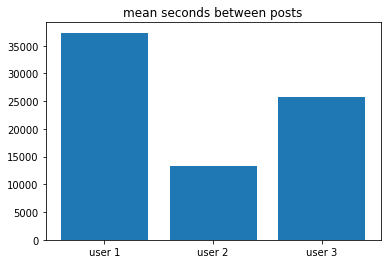

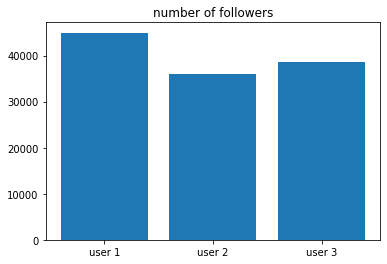

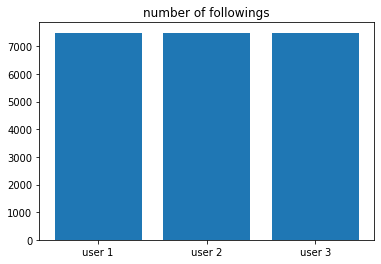

In [57]:
plt.bar(['user 1', 'user 2', 'user 3'], mean_seconds)
plt.title('mean seconds between posts')
plt.show()
plt.bar(['user 1', 'user 2', 'user 3'], supp_data[:,0])
plt.title('number of followers')
plt.show()
plt.bar(['user 1', 'user 2', 'user 3'], supp_data[:,1])
plt.title('number of followings')
plt.show()

### Task 6.2

In [110]:
p_time = df[['cts','number_likes','number_comments']].to_numpy()
time_int = []
for i in range(len(p_time)):
    temp = p_time[i][0].split(' ')
    time_int.append([int(temp[1][:2]), p_time[i][1],p_time[i][2]])
    
time_int = np.array(time_int)
#print(time_int[:20])

In [111]:
time_counts = []
for i in range(24):
    time_counts.append(time_int[:,0].tolist().count(i))
m_inds = np.argsort(time_counts)

#print(time_counts)
n = 24
likes_n_comments = []
for j in range(n):
    likes = 0
    comments = 0
    cnt = 0
    for i in range(len(time_int)):
        if time_int[i][0] == time_int[m_inds[j]][0]:
            likes += time_int[i][1]
            comments += time_int[i][2]
            cnt += 1
    likes_n_comments.append([likes/cnt,comments/cnt])
#print(likes_n_comments)
for i in range(n):
    print("Number of posts:  ",time_counts[i]," - mean likes: ", likes_n_comments[i][0]," - mean comments: ", likes_n_comments[i][1])

Number of posts:   34100  - mean likes:  360.4630901611503  - mean comments:  9.717439710155867
Number of posts:   30594  - mean likes:  306.86462972984225  - mean comments:  7.57752986721059
Number of posts:   29344  - mean likes:  382.2041338047321  - mean comments:  8.150484996827123
Number of posts:   27979  - mean likes:  312.3835833138036  - mean comments:  6.281022966955707
Number of posts:   25449  - mean likes:  384.9263147724711  - mean comments:  9.504395993687805
Number of posts:   22678  - mean likes:  361.0217352361617  - mean comments:  7.237077287474373
Number of posts:   20688  - mean likes:  360.4630901611503  - mean comments:  9.717439710155867
Number of posts:   22184  - mean likes:  305.0996855063348  - mean comments:  7.852205948423039
Number of posts:   24981  - mean likes:  343.8775208531306  - mean comments:  7.487100974905853
Number of posts:   28413  - mean likes:  319.10952451598547  - mean comments:  10.680142422668942
Number of posts:   31051  - mean likes

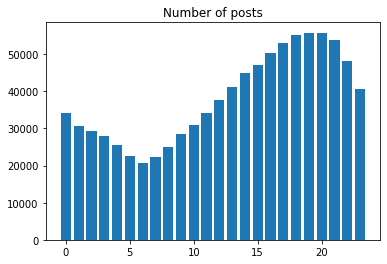

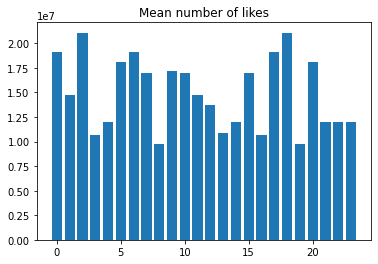

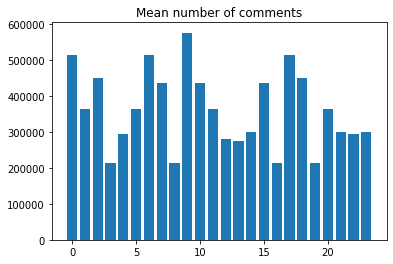

In [118]:
temp_lk_cm = np.array(likes_n_comments)
x_r = [i for i in range(24)]
plt.bar(x_r,np.array(time_counts))
plt.title("Number of posts")
plt.show()
plt.bar(x_r,temp_lk_cm[:,0])
plt.title("Mean number of likes")
plt.show()
plt.bar(x_r,temp_lk_cm[:,1])
plt.title("Mean number of comments")
plt.show()

# Problem 7

### Task 7.1

In [79]:
m_df = pd.merge(df, prof_df, on="profile_id")
m_df.head()

,sid_x,sid_profile,post_id,profile_id,location_id,cts_x,post_type,description_x,number_likes,number_comments,sid_y,profile_name,firstname_lastname,description_y,following,followers,n_posts,url,cts_y,is_business_account
0,28370919,3496776,BXdjjUlgcgq,2237947779,822632667,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0,3496776,andylund_,Andy Lund,"Professional Bicycle technician, Intense Racin...",520,1204,494,www.deevalleybicycleworkshop.co.uk,2019-05-13 17:27:02.273 -0400,false
1,13623950,3496776,BeyPed5hKj9,2237947779,30776247,2018-02-04 19:35:20.000,1,The dirty south was prime today. Top day with ...,86,2,3496776,andylund_,Andy Lund,"Professional Bicycle technician, Intense Racin...",520,1204,494,www.deevalleybicycleworkshop.co.uk,2019-05-13 17:27:02.273 -0400,false
2,28370963,3303402,BXoABqGAfra,11771599,282618748,2017-08-10 21:28:09.000,1,Hip hip hip #TheCrown 👑 saison 2 c est pour le...,114,11,3303402,fasilol,Françøise,Tranches de vie 🔪 Ét de 🍋 🎈\nfasilol1 👻,414,3906,3319,fr.pinterest.com/fasilol,2019-05-07 03:16:31.348 -0400,false
3,10318140,3406435,BxAN-l4JkNe,6027750611,1700344707,2019-05-03 16:16:42.000,1,⠀ ⠀ Руки не доходили поделиться с вами этими п...,46,30,3406435,olga_lamilashes,Ламинирование Парнас Спб,👩🏼‍💼Ольга \n🍀Ламинирование/ботокс/завивка ресн...,121,164,92,api.whatsapp.com/send?phone=79119121179,2019-05-08 08:56:53.986 -0400,true
4,28370948,3529017,BwIGwmFFEcc,6263700119,1700344707,2019-04-11 21:16:09.000,1,"Руки всегда обращают на себя внимание, поэтому...",66,1,3529017,nail_bar_blossom,Маникюр Ресницы Одинцово,💅🏻Безупречный маникюр\n⚜️Наращивание\n🎨Трендов...,3651,1640,546,chat.whatsapp.com/EadheTDKdII2uLm6ITrAj5,2019-05-16 10:17:38.523 -0400,true


In [81]:
cnt = 0
for i, row in m_df.iterrows():
    if row['number_likes'] > row['followers']/5:
        cnt += 1
print("probability    ",cnt/m_df.shape[0]*100," %")

probability     3.9620160701241782  %


### Task 7.2

In [82]:
loc2 = loc_df.rename(columns={"id": "location_id"})
m2_df = pd.merge(df, loc2, on="location_id")
mg_df = m2_df.groupby(['profile_id'])
mg_df.head(5)

,sid_x,sid_profile,post_id,profile_id,location_id,cts_x,post_type,description,number_likes,number_comments,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts_y
0,28370964,-1,BrYDPJeABJQ,16262389,282618748,2018-12-14 18:16:15.000,1,#beautiful #Christmas #lights,138,15,...,Covent Garden,covent-garden,GB,United Kingdom,-0.126802,51.513776,crown.sevendials,the-crown-seven-dials,http://www.taylor-walker.co.uk/pub/crown-coven...,2019-05-30 11:32:42.516
1,28370957,-1,BmQ418mgSnL,35673872,282618748,2018-08-09 17:53:46.000,1,As per your suggestion. #themerrytriotakeslondon,389,10,...,Covent Garden,covent-garden,GB,United Kingdom,-0.126802,51.513776,crown.sevendials,the-crown-seven-dials,http://www.taylor-walker.co.uk/pub/crown-coven...,2019-05-30 11:32:42.516
2,28370960,-1,Bm1YQ3Hn1gJ,840873396,282618748,2018-08-23 22:00:59.000,1,-Blue-💙,198,23,...,Covent Garden,covent-garden,GB,United Kingdom,-0.126802,51.513776,crown.sevendials,the-crown-seven-dials,http://www.taylor-walker.co.uk/pub/crown-coven...,2019-05-30 11:32:42.516
3,28370961,-1,2qBVjbTgzi,329994,282618748,2015-05-14 11:02:05.000,1,everything still feels so surreal ☁️,127,8,...,Covent Garden,covent-garden,GB,United Kingdom,-0.126802,51.513776,crown.sevendials,the-crown-seven-dials,http://www.taylor-walker.co.uk/pub/crown-coven...,2019-05-30 11:32:42.516
4,28370962,-1,BP5ViC6gaEf,360796468,282618748,2017-01-30 17:52:01.000,1,Guinness O'clock 🍺🍺 #london #pub #guinness #love,154,6,...,Covent Garden,covent-garden,GB,United Kingdom,-0.126802,51.513776,crown.sevendials,the-crown-seven-dials,http://www.taylor-walker.co.uk/pub/crown-coven...,2019-05-30 11:32:42.516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648118,29388106,-1,ByG7avmASq9,12121166102,284837820,2019-05-31 03:24:34.000,2,"Intensité , combativité...10/10 la meilleure a...",10,1,...,NaN,NaN,NaN,NaN,2.963170,50.590490,NaN,santes,NaN,2019-06-01 00:19:52.588
648119,29388093,-1,ByGW0pCnQw1,255575914,284837820,2019-05-30 22:00:49.000,1,My friends. Love you. Miss you.,105,6,...,NaN,NaN,NaN,NaN,2.963170,50.590490,NaN,santes,NaN,2019-06-01 00:19:52.588
648120,29388108,-1,ByGVpSfIMYs,8197965226,284837820,2019-05-30 21:50:32.000,1,Que des beaux gosses😂,22,4,...,NaN,NaN,NaN,NaN,2.963170,50.590490,NaN,santes,NaN,2019-06-01 00:19:52.588
648121,29388103,-1,ByFM0IQhxUn,9147008252,284837820,2019-05-30 11:14:08.000,1,#TeamUSP #JND2019 #JournéeNationaleDesDébutant...,89,0,...,NaN,NaN,NaN,NaN,2.963170,50.590490,NaN,santes,NaN,2019-06-01 00:19:52.588


In [84]:
locations = df['location_id'].unique()
#print(locations)
g = df.groupby(['profile_id'])['location_id'].apply(list)

In [85]:
tot = 0
cnt = 0
for i in range(len(g)):
    if len(g[i])> 1:
        for j in range(1,len(g[i])):
            tot += 1
            if g[i][:j].count(g[i][j]) > 0:
                cnt += 1

print("probability    ", cnt/tot* 100," %")

probability     90.14895010380526  %


# Problem 8

### Task 8.1

In [86]:
lnd = df[['number_likes','number_comments']].to_numpy()

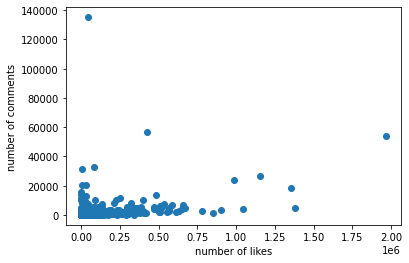

In [87]:
plt.scatter(lnd[:,0], lnd[:,1])
plt.xlabel('number of likes')
plt.ylabel('number of comments')
plt.show()

### Task 8.2

In [113]:
p_time = df[['cts','number_likes','number_comments']].to_numpy()
time_int = []
for i in range(len(p_time)):
    temp = p_time[i][0].split(' ')
    time_int.append([int(temp[1][:2]), p_time[i][1],p_time[i][2]])
    
time_int = np.array(time_int)

In [114]:
time_counts = []
for i in range(24):
    time_counts.append(time_int[:,0].tolist().count(i))
m_inds = np.argsort(time_counts)

#print(time_counts)
n = 24
likes_n_comments = []
mean_likes_n_comments = []
for j in range(n):
    likes = 0
    comments = 0
    cnt = 0
    for i in range(len(time_int)):
        if time_int[i][0] == time_int[m_inds[j]][0]:
            likes += time_int[i][1]
            comments += time_int[i][2]
            cnt += 1
    likes_n_comments.append([likes,comments])
    mean_likes_n_comments.append([likes/cnt,comments/cnt])

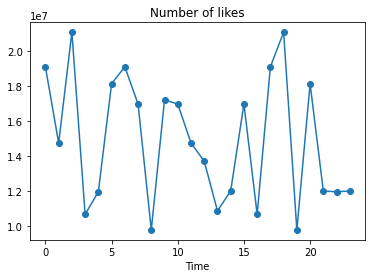

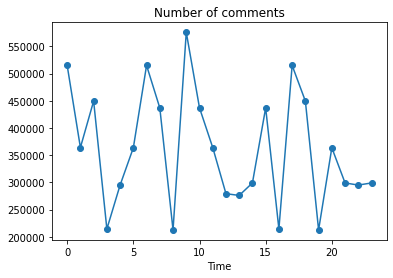

correlation coef o time and  number of likes:              -0.2596246407008756
correlation coef o time and  number of comments:           -0.26158611852235775
Pearson correlation coef o time and  number of likes:      -0.25962464070087543
Pearson correlation coef o time and  number of comments:   -0.2615861185223578


In [129]:
lk_cm_array = np.array(likes_n_comments)
mean_lk_cm_array = np.array(mean_likes_n_comments)
plt.plot(np.arange(24), lk_cm_array[:,0],'o-')
plt.title("Number of likes")
plt.xlabel("Time")
plt.show()
# plt.plot(np.arange(24), mean_lk_cm_array[:,0],'o-')
# plt.show()
plt.plot(np.arange(24), lk_cm_array[:,1],'o-')
plt.title("Number of comments")
plt.xlabel("Time")
plt.show()
# plt.plot(np.arange(24), mean_lk_cm_array[:,1],'o-')
# plt.show()
a = np.corrcoef(np.arange(24), lk_cm_array[:,0])
print("correlation coef o time and  number of likes:             ",a[0,1])
c = np.corrcoef(np.arange(24), lk_cm_array[:,1])
print("correlation coef o time and  number of comments:          ",c[0,1])
b = scipy.stats.pearsonr(np.arange(24), lk_cm_array[:,0])
print("Pearson correlation coef o time and  number of likes:     ",b[0])
b = scipy.stats.pearsonr(np.arange(24), lk_cm_array[:,1])
print("Pearson correlation coef o time and  number of comments:  ",b[0])

#### Conclusion:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**There is no strong relation between time and number of likes and comments**

### Task 8.3

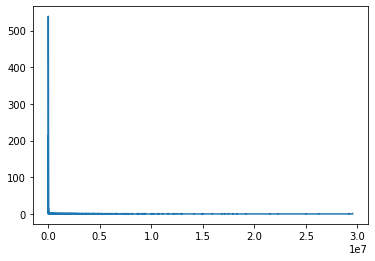

Number of followers
Mean    11269.612487668619
Mode    228
Quantile 25   427.0
Quantile 50   999.0
Quantile 75   2746.0


In [90]:
_followers = prof_df['followers'].to_numpy()
_fl = _followers.tolist()
un = list(set(_fl))

count = [0 for i in range(max(un)+1)]
for i in range(len(_fl)):
    count[_fl[i]] += 1

plt.plot(count)
plt.show()

print("Number of followers")
print("Mean   ", np.mean(_followers))
print("Mode   ", stats.mode(_followers)[0][0])
print("Quantile 25  ", np.quantile(_followers, 0.25))
print("Quantile 50  ", np.quantile(_followers, 0.5))
print("Quantile 75  ", np.quantile(_followers, 0.75))

### Task 8.4

- **Bar chart** compares the measure of categorical dimension.
- **Histogram** breaks down a numeric data into interval groups.
- **Scatter plots** compares one numeric attribute against another numeric attribute and visualizes the correlation between axes. Scatter plot is commonly applied to identify regression type of relationships such as linear regression, logistic regression etc.
- **Pie hart** is used to represent the percentage and weight of components belonging to one categorical attribute

### Task 8.5

- Compare frequency in categorical data
- Breaks x-axis data into intervals